In [50]:
model_type = 'rem_2conv' # or 'main or 'wo_pool' or "rem_2conv"

In [30]:
import torch
import torchvision
import torchvision.transforms as transforms

In [31]:
!wget https://www.dropbox.com/s/pjkn1icctxrc2en/Mask_Data.zip?dl=0

--2022-06-09 01:35:17--  https://www.dropbox.com/s/pjkn1icctxrc2en/Mask_Data.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/pjkn1icctxrc2en/Mask_Data.zip [following]
--2022-06-09 01:35:17--  https://www.dropbox.com/s/raw/pjkn1icctxrc2en/Mask_Data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb2fefde49497a116ed0bb2fc89.dl.dropboxusercontent.com/cd/0/inline/Bm3ql74BhuliB1hfcyY8RejAWM1O6x43jcVnhIFVfaoSVVOgiwmz-0lRAHkNfESeax8Et-biIxayRnb6R-kwYU8DKs-wjPSTdZBJP9tGnkyy-1y0sJybjyfznmP9sQ2Cgzlq33oRoiNaafKt4QOBL-qO19rVz2InLtjBNiOXrkEcpQ/file# [following]
--2022-06-09 01:35:18--  https://ucb2fefde49497a116ed0bb2fc89.dl.dropboxusercontent.com/cd/0/inline/Bm3ql74BhuliB1hfcyY8RejAWM1O6x43jcVnhIFVfaoSVVOgiwmz-0lRAHkN

In [5]:
!mv /content/Mask_Data.zip?dl=0 /content/Mask_Data.zip

!unzip /content/Mask_Data.zip

Archive:  /content/Mask_Data.zip
   creating: Mask_Data/cloth/
  inflating: Mask_Data/cloth/1.png   
  inflating: Mask_Data/cloth/1022.png  
  inflating: Mask_Data/cloth/1025.png  
  inflating: Mask_Data/cloth/1053.png  
  inflating: Mask_Data/cloth/1056.png  
  inflating: Mask_Data/cloth/1058.png  
  inflating: Mask_Data/cloth/1059.png  
  inflating: Mask_Data/cloth/1069.png  
  inflating: Mask_Data/cloth/1081.png  
  inflating: Mask_Data/cloth/1090.png  
  inflating: Mask_Data/cloth/111.png  
  inflating: Mask_Data/cloth/1126.png  
  inflating: Mask_Data/cloth/1144.png  
  inflating: Mask_Data/cloth/1145.png  
  inflating: Mask_Data/cloth/1152.png  
  inflating: Mask_Data/cloth/1156.png  
  inflating: Mask_Data/cloth/1158.png  
  inflating: Mask_Data/cloth/1186.png  
  inflating: Mask_Data/cloth/1193.png  
  inflating: Mask_Data/cloth/1209.png  
  inflating: Mask_Data/cloth/1224.png  
  inflating: Mask_Data/cloth/1232.png  
  inflating: Mask_Data/cloth/1234.png  
  inflating: Mask_Da

In [6]:
import os

class_dirs = [x[0] for x in os.walk('/content/Mask_Data')][1:]


root_dir = '/content/masks'

val_path = root_dir + '/mask_val'
test_path = root_dir + '/mask_test'
train_path = root_dir + '/mask_train'

if not os.path.isdir(root_dir):
    os.mkdir(root_dir)

if not os.path.isdir(val_path):
    os.mkdir(val_path)

if not os.path.isdir(test_path):
    os.mkdir(test_path)

if not os.path.isdir(train_path):
    os.mkdir(train_path)  

In [7]:
for cls in class_dirs:
    if not os.path.isdir(val_path + '/' + cls.split('/')[-1]):
        os.mkdir(val_path + '/' + cls.split('/')[-1])

    if not os.path.isdir(test_path + '/' + cls.split('/')[-1]):
        os.mkdir(test_path + '/' + cls.split('/')[-1])

    if not os.path.isdir(train_path + '/' + cls.split('/')[-1]):
        os.mkdir(train_path + '/' + cls.split('/')[-1]) 

In [8]:
from os import listdir
from os.path import isfile, join
import random
import shutil

for clss in class_dirs:
    #print(clss)
    onlyfiles = [join(clss, f) for f in listdir(clss) if isfile(join(clss, f))]
    random.shuffle(onlyfiles)
    
    #print(onlyfiles)
    files_len = len(onlyfiles)

    train_split = 0.7
    test_split = 0.15
    val_split = 0.15

    train_splt = onlyfiles[:int(train_split*files_len)]
    test_splt = onlyfiles[int(train_split*files_len): int(train_split*files_len) + int(test_split*files_len)]
    val_split = onlyfiles[int(train_split*files_len) + int(test_split*files_len) :]

    #for train_inst in train_splt:
    for img_fl in train_splt:
        final_dir = '/content/masks/mask_train'
        mask_class = img_fl.split('/')[-2]
        img_name = img_fl.split('/')[-1]

        shutil.copy(img_fl, final_dir + '/' + mask_class + '/' + img_name)

    for img_fl in test_splt:
        final_dir = '/content/masks/mask_test'
        mask_class = img_fl.split('/')[-2]
        img_name = img_fl.split('/')[-1]

        shutil.copy(img_fl, final_dir + '/' + mask_class + '/' + img_name)


    for img_fl in val_split:
        final_dir = '/content/masks/mask_val'
        mask_class = img_fl.split('/')[-2]
        img_name = img_fl.split('/')[-1]

        shutil.copy(img_fl, final_dir + '/' + mask_class + '/' + img_name)







In [9]:
import PIL

train_transform = transforms.Compose(
    [transforms.Resize((124,124)),
     transforms.ColorJitter(hue=.05, saturation=.05),
     transforms.RandomHorizontalFlip(),
     transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

test_transform = transforms.Compose(
    [transforms.Resize((124,124)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32




train_dataset = torchvision.datasets.ImageFolder(root = train_path, transform=train_transform)
test_dataset = torchvision.datasets.ImageFolder(root = test_path, transform=test_transform)
val_dataset = torchvision.datasets.ImageFolder(root = val_path, transform=test_transform)


#train_set, val_set, test_set = torch.utils.data.random_split(dataset, [int(0.7 * data_len), int(0.15 * data_len), int(data_len - (int(0.7 * data_len)+ int(0.15 * data_len)))])



trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

valloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('cloth', 'n95', 'surgical', 'mask_weared_incorrect', 'without_mask')


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:1293: UserWarning: The parameter 'resample' is deprecated since 0.12 and will be removed 0.14. Please use 'interpolation' instead.
  "The parameter 'resample' is deprecated since 0.12 and will be removed 0.14. "


In [51]:
## Code inspired by https://github.com/kuangliu/pytorch-cifar/blob/master/models/resnet.py

import torch.nn as nn
import torch.nn.functional as F
import torch

if model_type == 'main':

    class BasicBlock(nn.Module):
        expansion = 1
        def __init__(self, in_planes, planes, stride=1):
            super(BasicBlock, self).__init__()
            self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
            self.bn1 = nn.BatchNorm2d(planes)
            self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
            self.bn2 = nn.BatchNorm2d(planes)
            self.shortcut = nn.Sequential()
            if stride != 1 or in_planes != self.expansion*planes:
                self.shortcut = nn.Sequential(nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False), nn.BatchNorm2d(self.expansion*planes))
        def forward(self, x):
            out = F.relu(self.bn1(self.conv1(x)))
            out = self.bn2(self.conv2(out))
            out += self.shortcut(x)
            out = F.relu(out)
            return out

    class Bottleneck(nn.Module):
        expansion = 4
        def __init__(self, in_planes, planes, stride=1):
            super(Bottleneck, self).__init__()
            self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, bias=False)
            self.bn1 = nn.BatchNorm2d(planes)
            self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
            self.bn2 = nn.BatchNorm2d(planes)
            self.conv3 = nn.Conv2d(planes, self.expansion * planes, kernel_size=1, bias=False)
            self.bn3 = nn.BatchNorm2d(self.expansion*planes)
            self.shortcut = nn.Sequential()
            if stride != 1 or in_planes != self.expansion*planes:
                self.shortcut = nn.Sequential(nn.Conv2d(in_planes, self.expansion*planes,kernel_size=1, stride=stride, bias=False),
                    nn.BatchNorm2d(self.expansion*planes))
        def forward(self, x):
            out = F.relu(self.bn1(self.conv1(x)))
            out = F.relu(self.bn2(self.conv2(out)))
            out = self.bn3(self.conv3(out))
            out += self.shortcut(x)
            out = F.relu(out)
            return out


    class ResNet(nn.Module):
        def __init__(self, block, num_blocks, num_classes=10):
            super(ResNet, self).__init__()
            self.in_planes = 64
            self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
            self.bn1 = nn.BatchNorm2d(64)
            self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
            self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
            self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
            self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
            self.linear = nn.Linear(512*block.expansion, num_classes)
        def _make_layer(self, block, planes, num_blocks, stride):
            strides = [stride] + [1]*(num_blocks-1)
            layers = []
            for stride in strides:
                layers.append(block(self.in_planes, planes, stride))
                self.in_planes = planes * block.expansion
            return nn.Sequential(*layers)
        def forward(self, x):
            out = F.relu(self.bn1(self.conv1(x)))
            out = self.layer1(out)
            out = self.layer2(out)
            out = self.layer3(out)
            out = self.layer4(out)
            out = F.avg_pool2d(out, 4)
            out = out.view(out.size(0), -1)
            out = self.linear(out)
            return out

    def ResNet18():
        return ResNet(BasicBlock, [2, 2, 2, 2])

    model = ResNet18()
    num_class = 5

    model.linear = nn.Linear(in_features = 8192, out_features = num_class)


elif model_type == 'wo_pool':

    class BasicBlock(nn.Module):
        expansion = 1

        def __init__(self, in_planes, planes, stride=1):
            super(BasicBlock, self).__init__()
            self.conv1 = nn.Conv2d(
                in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
            self.bn1 = nn.BatchNorm2d(planes)
            self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
            self.bn2 = nn.BatchNorm2d(planes)

            self.shortcut = nn.Sequential()
            if stride != 1 or in_planes != self.expansion*planes:
                self.shortcut = nn.Sequential(
                    nn.Conv2d(in_planes, self.expansion*planes,
                              kernel_size=1, stride=stride, bias=False),
                    nn.BatchNorm2d(self.expansion*planes)
                )

        def forward(self, x):
            out = F.relu(self.bn1(self.conv1(x)))
            out = self.bn2(self.conv2(out))
            out += self.shortcut(x)
            out = F.relu(out)
            return out


    class Bottleneck(nn.Module):
        expansion = 4

        def __init__(self, in_planes, planes, stride=1):
            super(Bottleneck, self).__init__()
            self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, bias=False)
            self.bn1 = nn.BatchNorm2d(planes)
            self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=stride, padding=1, bias=False)
            self.bn2 = nn.BatchNorm2d(planes)
            self.conv3 = nn.Conv2d(planes, self.expansion *
                               planes, kernel_size=1, bias=False)
            self.bn3 = nn.BatchNorm2d(self.expansion*planes)

            self.shortcut = nn.Sequential()
            if stride != 1 or in_planes != self.expansion*planes:
                self.shortcut = nn.Sequential(
                    nn.Conv2d(in_planes, self.expansion*planes,
                              kernel_size=1, stride=stride, bias=False),
                    nn.BatchNorm2d(self.expansion*planes)
                )

        def forward(self, x):
            out = F.relu(self.bn1(self.conv1(x)))
            out = F.relu(self.bn2(self.conv2(out)))
            out = self.bn3(self.conv3(out))
            out += self.shortcut(x)
            out = F.relu(out)
            return out

    class ResNet(nn.Module):
        def __init__(self, block, num_blocks, num_classes=10):
            super(ResNet, self).__init__()
            self.in_planes = 64

            self.conv1 = nn.Conv2d(3, 64, kernel_size=3,
                               stride=1, padding=1, bias=False)
            self.bn1 = nn.BatchNorm2d(64)
            self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
            self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
            self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
            self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
            self.linear = nn.Linear(512*block.expansion, num_classes)

        def _make_layer(self, block, planes, num_blocks, stride):
            strides = [stride] + [1]*(num_blocks-1)
            layers = []
            for stride in strides:
                layers.append(block(self.in_planes, planes, stride))
                self.in_planes = planes * block.expansion
            return nn.Sequential(*layers)

        def forward(self, x):
            out = F.relu(self.bn1(self.conv1(x)))
            out = self.layer1(out)
            out = self.layer2(out)
            out = self.layer3(out)
            out = self.layer4(out)
            out = out.view(out.size(0), -1)
            out = self.linear(out)
            return out


    def ResNet18_woPool():
        return ResNet(BasicBlock, [2, 2, 2, 2])

    model = ResNet18_woPool()
    num_class = 5

    model.linear = nn.Linear(in_features = 131072, out_features = num_class)


elif model_type == "rem_2conv":


    class BasicBlock(nn.Module):
        expansion = 1

        def __init__(self, in_planes, planes, stride=1):
            super(BasicBlock, self).__init__()
            self.conv1 = nn.Conv2d(
                in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
            self.bn1 = nn.BatchNorm2d(planes)
            self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                                   stride=1, padding=1, bias=False)
            self.bn2 = nn.BatchNorm2d(planes)

            self.shortcut = nn.Sequential()
            if stride != 1 or in_planes != self.expansion*planes:
                self.shortcut = nn.Sequential(
                    nn.Conv2d(in_planes, self.expansion*planes,
                              kernel_size=1, stride=stride, bias=False),
                    nn.BatchNorm2d(self.expansion*planes)
                )

        def forward(self, x):
            out = F.relu(self.bn1(self.conv1(x)))
            out = self.bn2(self.conv2(out))
            out += self.shortcut(x)
            out = F.relu(out)
            return out


    class Bottleneck(nn.Module):
        expansion = 4

        def __init__(self, in_planes, planes, stride=1):
            super(Bottleneck, self).__init__()
            self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, bias=False)
            self.bn1 = nn.BatchNorm2d(planes)
            self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=stride, padding=1, bias=False)
            self.bn2 = nn.BatchNorm2d(planes)
            self.conv3 = nn.Conv2d(planes, self.expansion *
                               planes, kernel_size=1, bias=False)
            self.bn3 = nn.BatchNorm2d(self.expansion*planes)

            self.shortcut = nn.Sequential()
            if stride != 1 or in_planes != self.expansion*planes:
                self.shortcut = nn.Sequential(
                    nn.Conv2d(in_planes, self.expansion*planes,
                              kernel_size=1, stride=stride, bias=False),
                    nn.BatchNorm2d(self.expansion*planes)
                )

        def forward(self, x):
            out = F.relu(self.bn1(self.conv1(x)))
            out = F.relu(self.bn2(self.conv2(out)))
            out = self.bn3(self.conv3(out))
            out += self.shortcut(x)
            out = F.relu(out)
            return out


    class ResNet(nn.Module):
        def __init__(self, block, num_blocks, num_classes=10):
            super(ResNet, self).__init__()
            self.in_planes = 64

            self.conv1 = nn.Conv2d(3, 64, kernel_size=3,
                                   stride=1, padding=1, bias=False)
            self.bn1 = nn.BatchNorm2d(64)
            self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
            self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
            self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
            self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
            self.linear = nn.Linear(512*block.expansion, num_classes)

        def _make_layer(self, block, planes, num_blocks, stride):
            strides = [stride] + [1]*(num_blocks-1)
            layers = []
            for stride in strides:
                layers.append(block(self.in_planes, planes, stride))
                self.in_planes = planes * block.expansion
            return nn.Sequential(*layers)

        def forward(self, x):
            out = F.relu(self.bn1(self.conv1(x)))
            out = self.layer1(out)
            out = self.layer2(out)
            out = self.layer3(out)
            out = self.layer4(out)
            out = F.avg_pool2d(out, 4)
            out = out.view(out.size(0), -1)
            out = self.linear(out)
            return out



    def ResNet16():
        return ResNet(BasicBlock, [2, 2, 2, 1])      
    model = ResNet16()
    num_class = 5

    model.linear = nn.Linear(in_features = 8192, out_features = num_class)




In [36]:
!wget https://www.dropbox.com/s/mqwb58gyv1k6kl6/less_conv.pth?dl=0
!mv less_conv.pth?dl=0 less_conv.pth
!wget https://www.dropbox.com/s/7ukgg3a14l7m25n/main_model.pth?dl=0
!mv main_model.pth?dl=0 main_model.pth
!wget https://www.dropbox.com/s/zps9a0xopu7i8v2/remove_pool_.pth?dl=0
!mv remove_pool_.pth?dl=0 remove_pool_.pth

--2022-06-09 01:37:06--  https://www.dropbox.com/s/mqwb58gyv1k6kl6/less_conv.pth?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/mqwb58gyv1k6kl6/less_conv.pth [following]
--2022-06-09 01:37:06--  https://www.dropbox.com/s/raw/mqwb58gyv1k6kl6/less_conv.pth
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0c3342a21c43d912d793420a7a.dl.dropboxusercontent.com/cd/0/inline/Bm1dqW8AMRrza8NKQwtyx7owOeQ_VmgWUcMm14rE2_nGVrcBdaAZQvwaroqo_jeM_oN-CXQe6b8Or8Q8E0ZoKTfPkS6B9n5kScyk7HAkdQaSaC19wAK2zo8vjnudQpglbPWOrbDU87WBKDPrnUSdXxxPTu8QT0dEXZ_pBIKM4MszLQ/file# [following]
--2022-06-09 01:37:06--  https://uc0c3342a21c43d912d793420a7a.dl.dropboxusercontent.com/cd/0/inline/Bm1dqW8AMRrza8NKQwtyx7owOeQ_VmgWUcMm14rE2_nGVrcBdaAZQvwaroqo

In [52]:
#model_type = 'main' # or 'wo_pool' or "rem_2conv"


#in_f = model.linear.in_features


model.cuda()

if model_type == 'main':
    model.load_state_dict(torch.load('/content/main_model.pth'))
elif model_type == 'wo_pool':
    model.load_state_dict(torch.load('/content/remove_pool_.pth'))
elif model_type == 'rem_2conv':
    model.load_state_dict(torch.load('/content/less_conv.pth'))

In [53]:
# Setup the device to run the computations
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device::', device)

Device:: cuda:0


In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
import tqdm
device
y_pred_list = []
y_true_list = []
model.eval()
with torch.no_grad():
    for x_batch, y_batch in tqdm.tqdm(testloader):
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        y_test_pred = model(x_batch)
        _, y_pred_tag = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tag.cpu().numpy())
        y_true_list.append(y_batch.cpu().numpy())

100%|██████████| 11/11 [00:00<00:00, 11.35it/s]


In [56]:
y_pred_final = []
y_true_final = []
for i in y_pred_list:
    y_pred_final = y_pred_final + list(i)

for i in y_true_list:
    y_true_final = y_true_final + list(i)

In [57]:
print(classification_report(y_true_final, y_pred_final))
# if the model produces very high performance, it's because the data in the train-test split has changed. In order to avoid, 
# a random function should have been used a deterministic manner for reproducability.
# apologies for that

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        67
           1       0.99      1.00      0.99        67
           2       0.96      1.00      0.98        67
           3       0.97      0.97      0.97        67
           4       1.00      0.99      0.99        67

    accuracy                           0.98       335
   macro avg       0.98      0.98      0.98       335
weighted avg       0.98      0.98      0.98       335



In [48]:
print(confusion_matrix(y_true_final, y_pred_final))

[[64  0  2  0  1]
 [ 0 66  1  0  0]
 [ 3  0 63  1  0]
 [ 3  0  2 62  0]
 [ 0  0  0  0 67]]


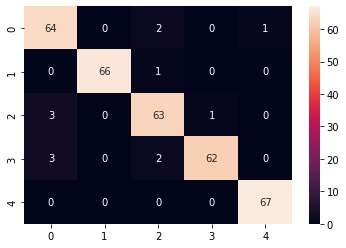

In [49]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_true_final, y_pred_final), annot=True)